# Métodos de regresión y ensamble

Existen diversos métodos de regresión y de ensamble que es necesario que conozcas. A continuación te presentamos dos videos; en el primero verás un caso práctico en el que utilizamos diversos métodos de regresión, en el segundo te explicaremos para que sirven los métodos de ensamble y algunos de los más comunes. 

# Descripción del problema

Los datos provienen de una planta minera.
El objetivo principal de estos datos es poder predecir la impureza en el concentrado de mineral extraído. Esta impureza es medida cada hora. Con las predicciones podríamos ayudar a los ingenieros con una alerta temprana para que puedan tomar acciones correctivas. 


- `% Silica Concentrate` es la concentración de sílice (laboratorio).
- `% Iron Concentrate` es la concentración de hierro (laboratorio).
- El concentrado de sílice es la impureza en el mineral de hierro que debe eliminarse.
- El proceso actual de detección de sílice lleva muchas horas.


Con la ayuda de algunos análisis y modelos de datos, podemos dar una buena aproximación del concentrado de sílice que reducirá mucho tiempo y esfuerzos necesarios para procesar el mineral de hierro


Fuente:
https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process


## Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

## Lectura de datos

In [2]:
df = pd.read_csv('data/MiningProcess_Flotation_Plant_Database.csv', decimal=",").drop_duplicates()
# con '.drop_duplicates()' quitaremos todas los datos que sean filas iguales

In [3]:
# eliminamos las columnas 'date' y '% Iron Concentrate'
df = df.drop(["date","% Iron Concentrate"],axis = 1)

In [4]:
# Cogemos una muestra del df de 10000 elementos por hacer el
# ejercicio más fluido y rápido
df = df.sample(10000)

In [5]:
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
209421,52.61,20.24,369.674064,357.070434,406.877695,8.93612,1.521029,233.340,247.049,248.449,...,296.091,305.874,803.249969,749.689181,832.690241,654.176262,527.029774,689.075973,476.985535,5.03
306693,64.03,6.26,1008.237600,595.732000,401.139000,10.20590,1.711880,300.366,254.360,299.275,...,300.359,297.084,605.972000,590.294000,614.326000,496.682000,508.704000,506.782000,502.082000,2.81
100836,53.32,18.85,2042.370000,480.264000,400.413000,9.47610,1.775150,249.641,247.683,252.088,...,250.011,250.797,703.979000,691.016000,689.401000,512.965000,457.458000,375.624000,507.587000,2.67
698369,54.59,17.81,413.250500,608.967000,409.192000,8.87891,1.723870,300.023,297.027,301.625,...,364.397,330.298,584.010000,584.007000,589.096000,397.226000,356.599000,477.417000,324.596000,4.12
419640,50.70,23.17,2845.880000,664.716000,410.279714,9.60504,1.712840,300.327,301.615,298.028,...,290.521,303.592,398.692000,397.942000,404.471000,417.583000,401.260000,399.140000,392.279000,1.15


In [6]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,56.371412,14.539426,2851.927181,487.344277,397.524305,9.765679,1.680313,279.805752,276.750542,280.732077,...,291.949192,290.629473,519.555942,523.463574,531.358259,421.534871,425.754302,430.305026,421.123267,2.344953
std,5.109759,6.750226,1214.564766,91.543929,9.762077,0.387517,0.069839,29.820385,30.349901,28.749021,...,30.487994,28.787460,131.551685,128.021604,152.000299,91.403553,85.233460,91.002383,85.108827,1.135268
min,42.740000,1.310000,0.186540,242.310000,376.255000,8.753423,1.519837,175.857480,176.648487,176.670284,...,190.219000,186.306769,149.593000,211.354000,126.570000,162.483483,168.794205,158.634000,175.483000,0.600000
25%,52.750000,8.940000,2070.142340,432.401250,394.124750,9.526735,1.648088,250.269000,250.361250,250.795000,...,257.655500,255.536250,416.464250,442.376500,410.492500,358.035000,357.722250,358.168500,356.350750,1.450000
50%,56.200000,13.540000,3000.815000,504.452500,399.193000,9.797020,1.698245,299.318500,296.107500,298.630000,...,299.456500,298.981000,490.852000,496.677500,494.576500,413.575500,409.845000,428.073000,411.519500,2.020000
75%,59.720000,19.470000,3702.282500,552.265500,402.976250,10.036125,1.728012,300.131000,300.590000,300.366000,...,303.144500,301.802500,594.700250,596.230250,601.541250,485.024250,483.279500,493.241250,475.967500,3.030000
max,65.780000,33.400000,6293.770000,739.339000,418.585000,10.807831,1.853218,368.152250,368.750000,320.255000,...,370.823000,371.367000,861.484000,828.766000,886.701444,678.894182,675.175000,698.587095,659.614000,5.530000


## Preparación de datos

In [7]:
# en 'y' metemos '% Silica Concentrate'  que era nuestra variable objetivo del 
# enundiado, y en 'X' el resto de datos del df.
y = df['% Silica Concentrate']
X = df.drop(['% Silica Concentrate'], axis=1)

In [8]:
# Para trabajar de una manera sencilla y practica escalamos esos datos 
scaler_X = preprocessing.MinMaxScaler()
scaler_y = preprocessing.MinMaxScaler()

X = pd.DataFrame(scaler_X.fit_transform(X),columns=X.columns)
y = scaler_y.fit_transform(y.values.reshape(-1, 1))


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=103)

In [17]:
# vamos a definir una funcion para poder usarla a lo largo de esta libreta para graficar.
# Recibe 4 parámtetro, la 'y' de entrenamiento, la 'y  de prediccion de entrenamiento,
# la 'y' de prueba y la 'y' de prueba de prediccion

def plot(y_train,y_train_hat,y_test,y_test_hat):
    
    #Definimos los limites de la  grafica
    plt.figure(figsize=(10,10))
    plt.axis([0,1,0,1]) # ejes 'x' e 'y' de 0 a 1
    plt.plot([[0,0],[1,1]], "r--") #grafica diagonal como referencia
    
    #Grafica de dispersión (Real vs predicción)
    plt.scatter(y_train,y_train_hat, label="Entrenamiento",alpha=0.8)
    plt.scatter(y_test,y_test_hat, label="Prueba", alpha=0.8)
    
    #Preparamos las etiquetas
    plt.legend()
    plt.xlabel("Y Real")
    plt.ylabel("Y Predicción")
    
    #Calculamos error cuadrático medio
    #'.inverse_transform' Transforme las etiquetas nuevamente a la codificación original.
    error = mean_squared_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)),
                               scaler_y.inverse_transform(y_test_hat.reshape(-1, 1)))
    print("El error cuadrático medio es {}".format(error))

## Regresión Lineal

In [18]:
from sklearn.linear_model import LinearRegression
#Creando el modelo y entrenando
reg = LinearRegression().fit(X_train,y_train)
#Prediciendo valores de entrenamiento
y_train_hat = reg.predict(X_train)
#Prediciendo valores de validación
y_test_hat = reg.predict(X_test)

El error cuadrático medio es 1.1422350137456723


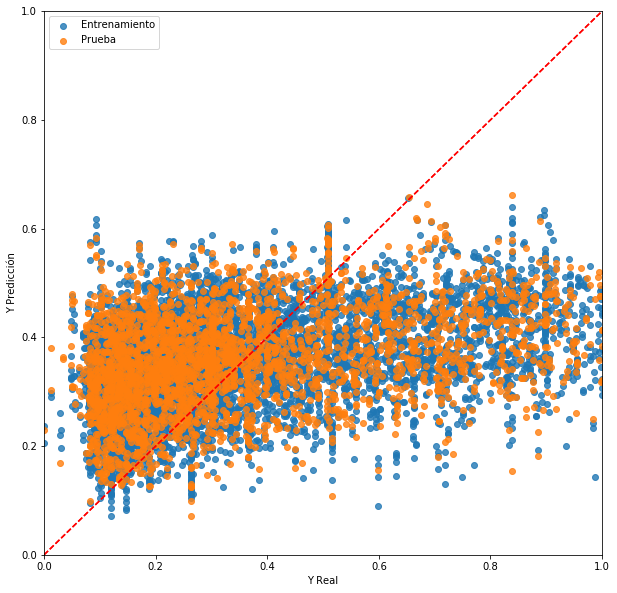

In [19]:
plot(y_train,y_train_hat,y_test,y_test_hat)

# Vemos en el resultado que nuestro modelo de regresión no se parece en lo más mínimo 
# al modelo que debería existir, no se puede ver que nuestra línea atraviese todos
# esos datos. Esta primera aproximación no nos vale. Vamos a probar con el siguiente
# modelo para ver si se aproxima algo más.

## SVR

El error cuadrático medio es 1.0895475562161603


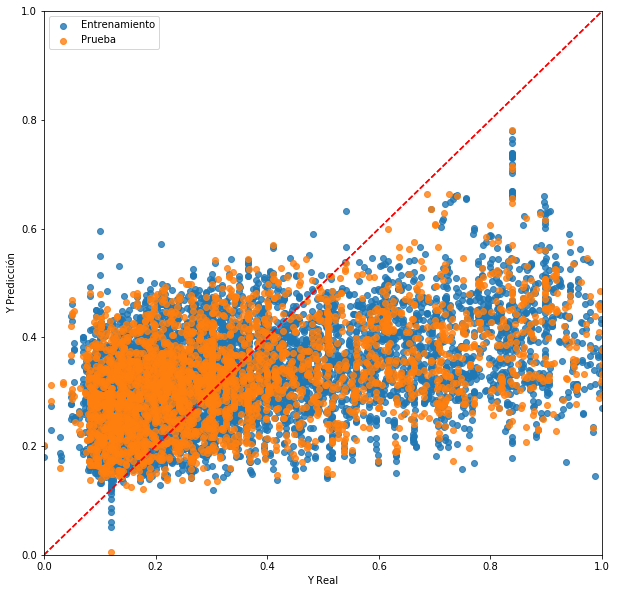

In [20]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', gamma='auto')
svr_rbf.fit(X_train,y_train.ravel())
#Prediciendo valores de entrenamiento
y_train_hat = svr_rbf.predict(X_train)
#Prediciendo valores de validación
y_test_hat = svr_rbf.predict(X_test)

plot(y_train,y_train_hat,y_test,y_test_hat)

# Todavía podemos apreciar que los datos no se ajustan al modelo
# pero en este caso el error cuadrático medio a descendido un poco
# con lo que vamos por buen camino.


El error cuadrático medio es 1.1299279349942586


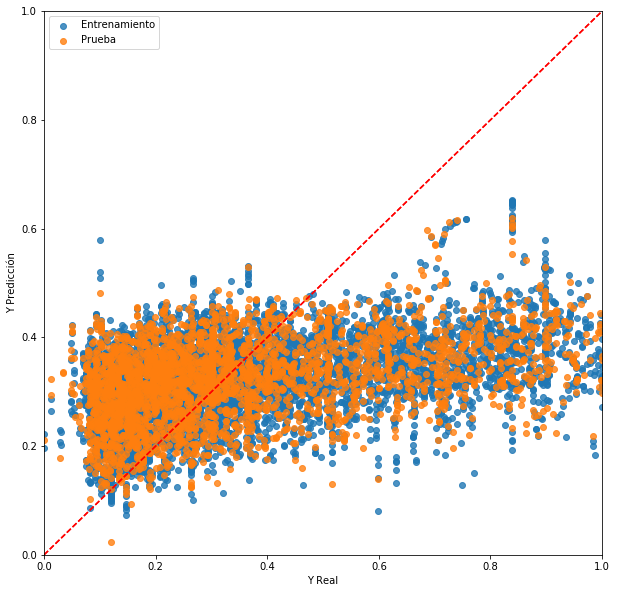

In [21]:
# Probamos otros SVR con un kernel diferente:

svr_poly = SVR(kernel='poly', gamma='auto')
svr_poly.fit(X_train,y_train.ravel())
#Prediciendo valores de entrenamiento
y_train_hat = svr_poly.predict(X_train)
#Prediciendo valores de validación
y_test_hat = svr_poly.predict(X_test)

plot(y_train,y_train_hat,y_test,y_test_hat)

# Tiene peor error cuadrático medio que con el otro kernel.

## Arbol de decisión

El error cuadrático medio es 0.9720641548325986


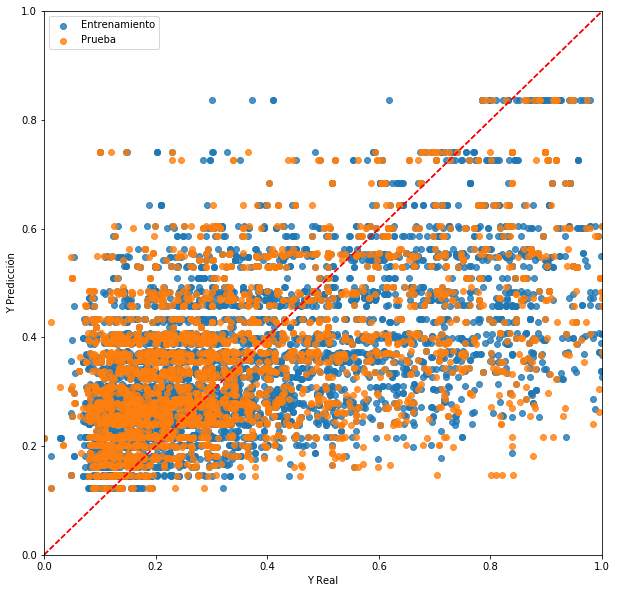

In [22]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=12,min_samples_leaf=50)
tree.fit(X_train,y_train.ravel())
#Prediciendo valores de entrenamiento
y_train_hat = tree.predict(X_train)
#Prediciendo valores de validación
y_test_hat = tree.predict(X_test)

plot(y_train,y_train_hat,y_test,y_test_hat)

# En este caso el error desciendo aún más pero sigue sin ser exacto, lo cual nos hace
# pensar que igual estamos tomando demasiadas variables o características. De ahí que
# en muchas ocasiones tengamos que seleccionar las variables adecuadas.

# Selección de variables

In [27]:
# Importamos la SELECCION DE CARACTERISTICAS RFE
from sklearn.feature_selection import RFE
# Vamos a coger un estimador que sea una regresión linear
estimator = LinearRegression()
# A partir de ese estmador buscamos las 8 características, por
# ejemplo, más importantes.
selector = RFE(estimator, 8, step=1)
selector = selector.fit(X_train, y_train.ravel())

In [28]:
# Reducimos a las varibles importantes y las metemos en una nueva variables
X_train_reduced = X_train.loc[:, selector.support_]
X_test_reduced = X_test.loc[:, selector.support_]
X_train_reduced.head()

,Amina Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 06 Air Flow,Flotation Column 05 Level
8621,0.372969,0.612996,0.711044,0.637351,0.676877,0.581206,0.609006,0.591436
7631,0.570310,0.350255,0.584682,0.380540,0.392589,0.536410,0.608917,0.388011
1561,0.637804,0.595921,0.578799,0.383950,0.390545,0.477763,0.373407,0.559087
2483,0.005888,0.168351,0.002123,0.386221,0.407734,0.550008,0.608956,0.372450
4349,0.394962,0.712004,0.289848,0.644185,0.688287,0.631893,0.584977,0.522620


El error cuadrático medio es 1.0103151291676855


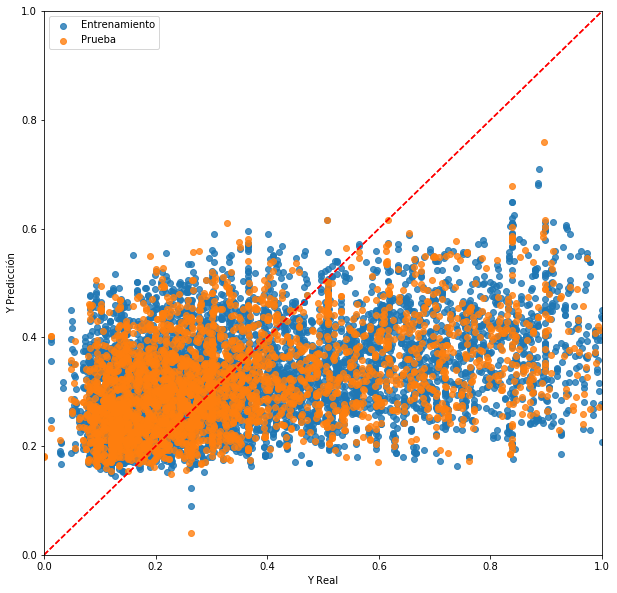

In [32]:
# Ahora si hacemos un modelo de predicción solamente con estos nuevos 
# datos es de esperar que sea más parecido al modelo que estamos esperando
# o el modelo que representa mejor nuestros datos.

svr_rbf = SVR(kernel='rbf', gamma='auto')
svr_rbf.fit(X_train_reduced,y_train.ravel())
#Prediciendo valores de entrenamiento
y_train_hat = svr_rbf.predict(X_train_reduced)
#Prediciendo valores de validación
y_test_hat = svr_rbf.predict(X_test_reduced)

plot(y_train,y_train_hat,y_test,y_test_hat)

# Aún sigue sin ser completamente adecuada a nuestras necesidades. 

# En el próximo apartado vamos a hablar de lo que se conoce como método de ensamble,
# donde los métodos de ensamble van a ser una mezcla de múltiples métodos de regresión para
# tratar de encontrar un método un poco más complejo para que pueda hacer un modelo 
# que se parezca más a la realidad de nuestros datos.


# Métodos de ensamble

Los métodos de ensamble de modelos utilizan múltiples algoritmos de aprendizaje para obtener un mejor rendimiento predictivo que el que se podría obtener de cualquiera de los algoritmos de aprendizaje de manera individual.

Estos nos proporcionan una manera de utilizar modelos de forma colaborativa a medida de que van a mejorar el error en un sistema similar a un sistema de votación donde el conjunto de modelos va a tener una mayor precisión que los modelos individuales. 

El error cuadrático medio es 0.6337628238855231


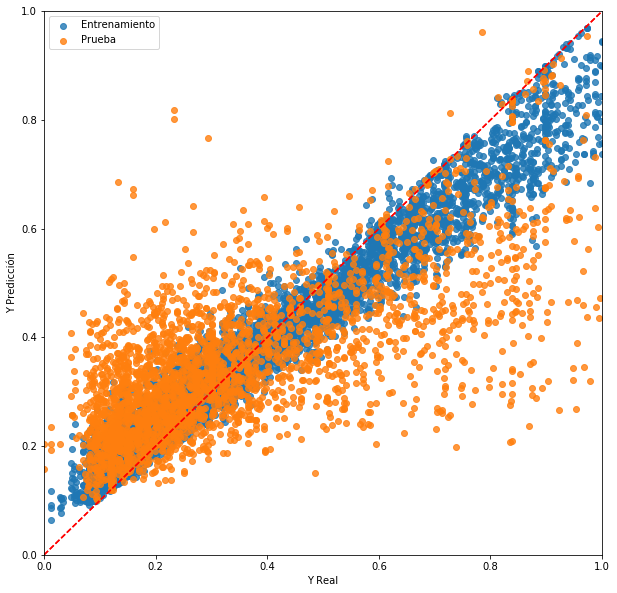

In [34]:
# Uno de los métodos de ensamble más populares el Bosque de Regresión.
# Vimos uno llamado "árbol de regresión" la intuición nos diría que el bosque 
# de regresión es un conjunto de árboles de regresión que trabajan de manera paralela,
# de forma de que los resultados de estos árboles de regresión se puedan concentrar en uno
# solo.

# La palabra "random" viene de que cada uno de estos árboles de regresión se construyen
# de una manera aleatoria, no a la hora de construirlo, sino a la hora de seleccionar
# qué variables va a utilizar ese árbol en específico. 

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train.ravel())

#Prediciendo valores de entrenamiento
y_train_hat = rf.predict(X_train)
#Prediciendo valores de validación
y_test_hat = rf.predict(X_test)

plot(y_train,y_train_hat,y_test,y_test_hat)

# Ahora sí, la gráfica, aunque no es perfecta, ya se ve mucho mejor que los
# modelos individuales. Si se fijan los puntos azules están muy pegados a la
# línea roja. Los naranjas todavía no logran llegar a
# un grado perfecto, todavía podemos mejorarlo de alguna manera, pero la
# diferencia con los modelos que construimos antes es muy grande.

El error cuadrático medio es 0.6031832391861249


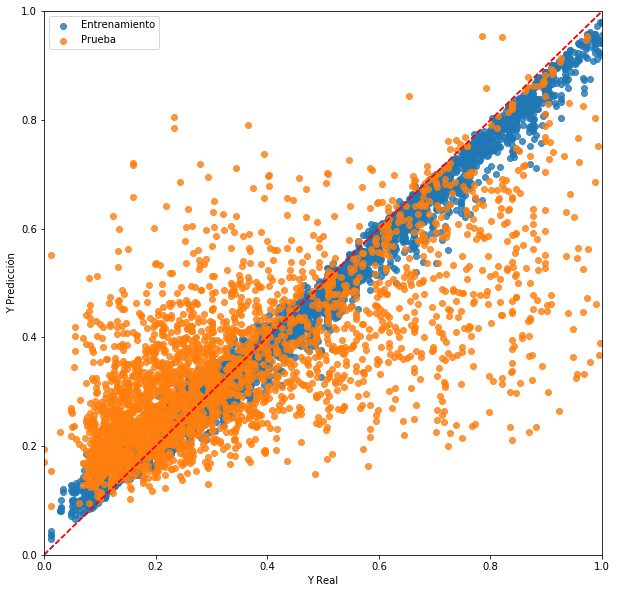

In [35]:
# Usamos otro método o algoritmo de ensamblaje.

# GradientBoostingRegressor que también construye árboles de regresión, pero 
# en lugar de generarlos de manera paralela los construye uno seguido del otro. 

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=40,  max_depth=12, learning_rate=0.1)
gbr.fit(X_train,y_train.ravel())

#Prediciendo valores de entrenamiento
y_train_hat = gbr.predict(X_train)
#Prediciendo valores de validación
y_test_hat = gbr.predict(X_test)

plot(y_train,y_train_hat,y_test,y_test_hat)

# Nos arroja a este resultado donde los puntos azules se acercan todavía más
# y los naranjas parece que tienen una tendencia a seguir la línea roja.

# Entonces, pareciera ser que este modelo que acabamos de crear está funcionando 
# mejor que todos los que vamos quedaban con anterioridad, pero, como les decía, 
# todavía hay espacio de mejora. ¿Qué podríamos hacer? Bueno, una alternativa es 
# empezar a hacer ingeniería de datos de manera que estamos creando datos 
# artificiales a partir de los que ya tenemos.